### DATASET: FOOD ENFORCEMENT ###
**Information:**
- Data Source: FDA Recall Enterprise System (RES) 
- Time Period Covered: 2004 to Present
- Terms: https://open.fda.gov/terms/
- License: https://open.fda.gov/license/
- Last Updated: 2024-09-25
- Total: 26467

#### 1. Business Understanding and Analytic Approach

<p>Recalling defective or potentially harmful FDA-regulated products is the most effective way to protect public health. Most recalls are voluntary, initiated by companies upon discovering issues, but they can also occur after FDA raises concerns. Recalls are generally more efficient than formal legal actions and ensure consumer protection.  The FDA oversees the recall process, classifies the hazards, and assesses the adequacy of the recall, with information published in Enforcement Reports. </p>
<p>While not all recalls are widely publicized, they are included in the FDA's weekly reports once classified. Manufacturers can initiate recalls at any time to address risks, and the FDA may update recall information as necessary, such as expanding the scope of a recall based on new findings.</p>


The FDA classifies food recalls into three main categories based on the severity of the potential health risk:

- Class I Recall: This is the most serious type of recall. It involves situations where there is a reasonable probability that the use of, or exposure to, the recalled food will cause serious adverse health consequences or death.

- Class II Recall: This type of recall involves situations where the use of, or exposure to, the recalled food may cause temporary or medically reversible adverse health consequences, or where the probability of serious adverse health consequences is remote. 

- Class III Recall: This is the least serious type of recall. It pertains to products that are not likely to cause any adverse health consequences. 

#### 2. Data Collection, Understanding, Preparation

##### a. Data Collection

In [59]:
!pip install countryinfo

In [61]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
from countryinfo import CountryInfo
import numpy as np

In [62]:
# Loading Data from downloaded JSON file
with open('food_enforcement.json', 'r') as file:
    data = json.load(file)

In [63]:
# Converting into DataFrame using Pandas
food_enforcement_df = pd.DataFrame.from_dict(data)

# Coverting DataFrame to CSV to load data into database easier
food_enforcement_df.to_csv('food_enforcement.csv')

In [64]:
len(food_enforcement_df.recall_number.unique())

26467

In [65]:
# Data Exploration
food_enforcement_df.head(3)

,status,city,state,country,classification,openfda,product_type,event_id,recalling_firm,address_1,...,recall_number,product_description,product_quantity,reason_for_recall,recall_initiation_date,center_classification_date,report_date,code_info,more_code_info,termination_date
0,Ongoing,Topeka,KS,United States,Class II,{},Food,95096,"Reser's Fine Foods, Inc.",3728 SE 6th St,...,F-1803-2024,"UPC 71117 14743, Reser s Rotisserie Chicken Sa...",38 cases,Foreign material.,20240802,20240912,20240918,Use By Sep/13/2024,,NaN
1,Ongoing,Topeka,KS,United States,Class II,{},Food,95096,"Reser's Fine Foods, Inc.",3728 SE 6th St,...,F-1801-2024,"UPC 71117 19063, Reser's American Classics Gar...",278 cases,Foreign material.,20240802,20240912,20240918,Use By Sep/05/2024,,NaN
2,Ongoing,Boulder,CO,United States,Class II,{},Food,95255,"American Outdoor Products, Inc.",6350 Gunpark Dr,...,F-1807-2024,American Outdoor Products - Astronaut Strawber...,"14,235 units",Elevated levels of lead,20240822,20240912,20240918,"UPC: 048143300106 Lot numbers: 125130, 125133...",,NaN


In [66]:
# Check for missing values:
null_data = food_enforcement_df.isnull().sum()

null_data

status                            0
city                              0
state                             0
country                           0
classification                    0
openfda                           0
product_type                      0
event_id                          0
recalling_firm                    0
address_1                         0
address_2                         0
postal_code                       0
voluntary_mandated                0
initial_firm_notification         0
distribution_pattern              0
recall_number                     0
product_description               0
product_quantity                  0
reason_for_recall                 0
recall_initiation_date            0
center_classification_date        1
report_date                       0
code_info                         0
more_code_info                15715
termination_date               1333
dtype: int64

##### b. Data Understanding

In [27]:
food_enforcement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26467 entries, 0 to 26466
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   status                      26467 non-null  object
 1   city                        26467 non-null  object
 2   state                       26467 non-null  object
 3   country                     26467 non-null  object
 4   classification              26467 non-null  object
 5   openfda                     26467 non-null  object
 6   product_type                26467 non-null  object
 7   event_id                    26467 non-null  object
 8   recalling_firm              26467 non-null  object
 9   address_1                   26467 non-null  object
 10  address_2                   26467 non-null  object
 11  postal_code                 26467 non-null  object
 12  voluntary_mandated          26467 non-null  object
 13  initial_firm_notification   26467 non-null  ob

In [28]:
country_data = food_enforcement_df.country.unique()

In [29]:
asian_countries = []
europe_countries = []
americas_contries = []
africa_aus_countries = []
for country in country_data:
    if CountryInfo(country).region() == 'Asia':
        asian_countries.append(country)
    elif CountryInfo(country).region() == 'Europe':
        europe_countries.append(country)
    elif CountryInfo(country).region() == 'Americas':
        americas_contries.append(country)
    else:
        africa_aus_countries.append(country)

##### c. Data Cleaning

**Formating date in data**

In [96]:
for row in food_enforcement_df['recall_initiation_date']:
    if int(row) < 20000000:
        print("Invalid date data:", row)

Invalid date data: 02121207


In [99]:
# specify the index of the invalid data 
i = food_enforcement_df[(food_enforcement_df.recall_initiation_date== '02121207')].index

# then drop row ith

food_enforcement_df.drop(i, inplace=True)

In [117]:
food_enforcement_df['recall_initiation_date'] = pd.to_datetime(food_enforcement_df['recall_initiation_date'])

**Filter Relevant Columns**

In [104]:
food_enforcement_df = food_enforcement_df[['status', 'city', 'country', 'classification',
                                           'recalling_firm', 'voluntary_mandated', 'distribution_pattern',
                                           'recall_initiation_date', 'recall_number']]

food_enforcement_df.head(3)

,status,city,country,classification,recalling_firm,voluntary_mandated,distribution_pattern,recall_initiation_date,recall_number
0,Ongoing,Topeka,United States,Class II,"Reser's Fine Foods, Inc.",Voluntary: Firm initiated,"Distributed in AR, IL, KS, MO, NC, NE, OK, TN,...",2024-08-02,F-1803-2024
1,Ongoing,Topeka,United States,Class II,"Reser's Fine Foods, Inc.",Voluntary: Firm initiated,"Distributed in AR, IL, KS, MO, NC, NE, OK, TN,...",2024-08-02,F-1801-2024
2,Ongoing,Boulder,United States,Class II,"American Outdoor Products, Inc.",Voluntary: Firm initiated,"Nationwide: Alabama, California, Colorado, Del...",2024-08-22,F-1807-2024


In [105]:
def classify_region(country):
    if country in asian_countries:
        return 'Asia'
    elif country in europe_countries:
        return 'Europe'
    elif country in americas_contries:
        return 'Americas'
    else: 
        return 'Other'

In [106]:
food_enforcement_df['region'] = food_enforcement_df['country'].apply(classify_region)

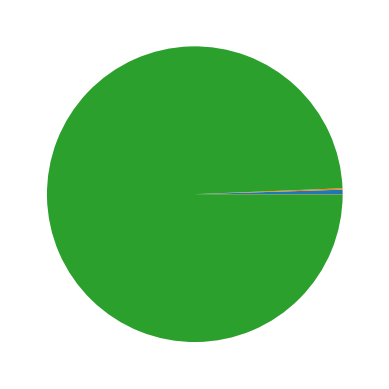

In [107]:
# Getting number of food enforcement case in each region

asia_number = len(food_enforcement_df[food_enforcement_df['region']=='Asia'])
europe_number = len(food_enforcement_df[food_enforcement_df['region']=='Europe'])
americas_number = len(food_enforcement_df[food_enforcement_df['region']=='Americas'])
other_number = len(food_enforcement_df[food_enforcement_df['region']=='Other'])

region_lable = np.array(["Asia", "Europe", "Americas", "Other"])
food_enforcement_case_number = np.array([asia_number, europe_number, americas_number, other_number])

# plt.bar(region_lable, food_enforcement_case_number, width = 0.1)
plt.pie(food_enforcement_case_number)
plt.show()

In [115]:
terminated_number = len(food_enforcement_df[food_enforcement_df['status']=='Terminated'])
on_going_number = len(food_enforcement_df[food_enforcement_df['status']=='Ongoing'])
completed_number = len(food_enforcement_df[food_enforcement_df['status']=='Completed'])

In [128]:
enforcement_time = food_enforcement_df.groupby('recall_initiation_date')['recall_number'].count()
# enforcement_time = enforcement_time.set_index('recall_initiation_date')

enforcement_time.head()

recall_initiation_date
2008-02-22     1
2008-06-07     3
2008-06-09     1
2008-07-07    32
2009-01-28     2
Name: recall_number, dtype: int64

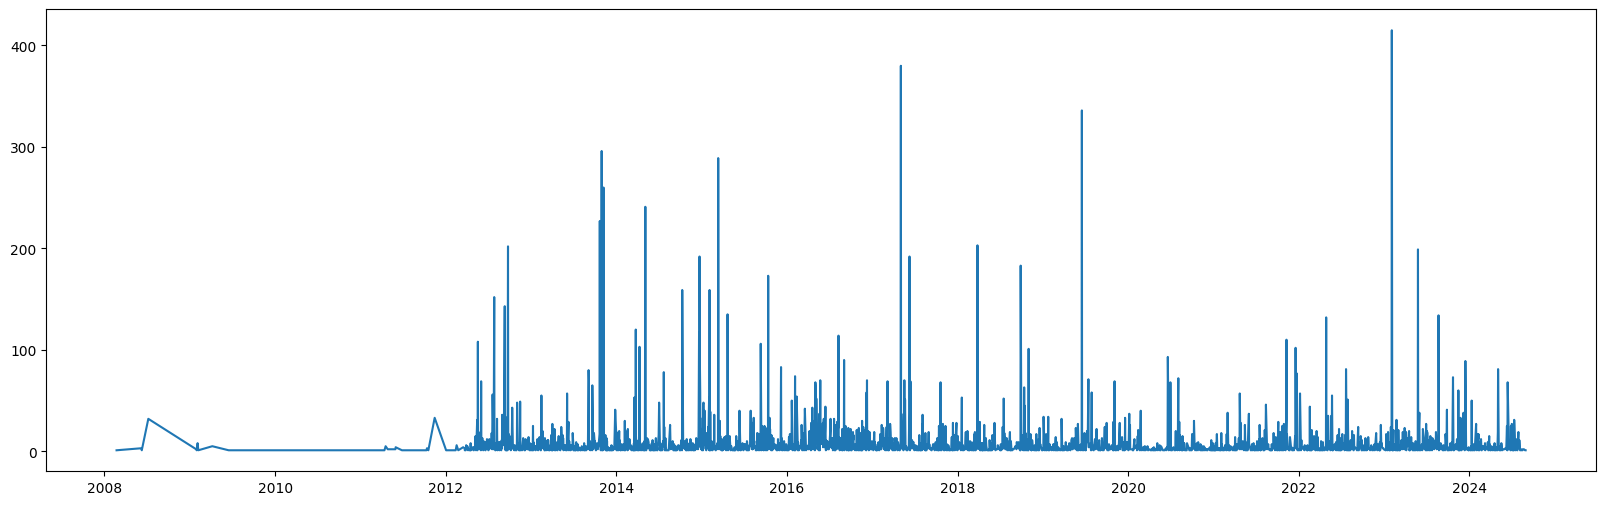

In [132]:
# Time series of number of food enforcement process
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(enforcement_time)